In [1]:
#import packages
from statsbombpy import sb
import pandas as pd

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from collections import Counter



In [3]:
# --- Import required packages ---
from statsbombpy import sb
import pandas as pd

# LIGUE 1 2015-2016
competition_id = 7
season_id = 27

# --- Load all match IDs for the competition and season ---
matches = sb.matches(competition_id=competition_id, season_id=season_id)
match_ids = matches['match_id'].tolist()

# --- Download all events for these matches and extract assists ---
assists_list = []
for match_id in match_ids:
    df = sb.events(match_id=match_id, flatten_attrs=True)
    # Ensure 'pass_goal_assist' exists and fill missing with False
    if 'pass_goal_assist' not in df.columns:
        df['pass_goal_assist'] = False
    else:
        df['pass_goal_assist'] = df['pass_goal_assist'].fillna(False)
    # Filter for passes that are assists
    assists = df[(df['type'] == 'Pass') & (df['pass_goal_assist'] == True)]
    assists_list.append(assists)

# --- Concatenate all assists into a single DataFrame ---
df_assists = pd.concat(assists_list, ignore_index=True)

# --- (Optional) Reset index and inspect the result ---
df_assists.reset_index(drop=True, inplace=True)
print(f"Extracted {len(df_assists)} assists from competition {competition_id}, season {season_id}")
print(df_assists[['match_id', 'minute', 'player', 'team', 'pass_length', 'pass_angle', 'pass_height', 'pass_technique']].head())


/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_14841/3160610312.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pass_goal_assist'] = df['pass_goal_assist'].fillna(False)
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_14841/31606103

Extracted 596 assists from competition 7, season 27
   match_id  minute                 player     team  pass_length  pass_angle  \
0   3901199      11  Giovanni-Guy Yann Sio   Rennes    24.233036    1.277759   
1   3901199      14         Kamil Grosicki   Rennes     8.792042    1.234658   
2   3901199      66         Sylvain Armand   Rennes    49.820580    0.537321   
3   3901178      33          Walid Mesloub  Lorient    33.866207    0.722719   
4   3901260      26            Jimmy Cabot  Lorient    25.293674    1.202771   

   pass_height pass_technique  
0  Ground Pass            NaN  
1  Ground Pass            NaN  
2    High Pass            NaN  
3  Ground Pass   Through Ball  
4    High Pass            NaN  


/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


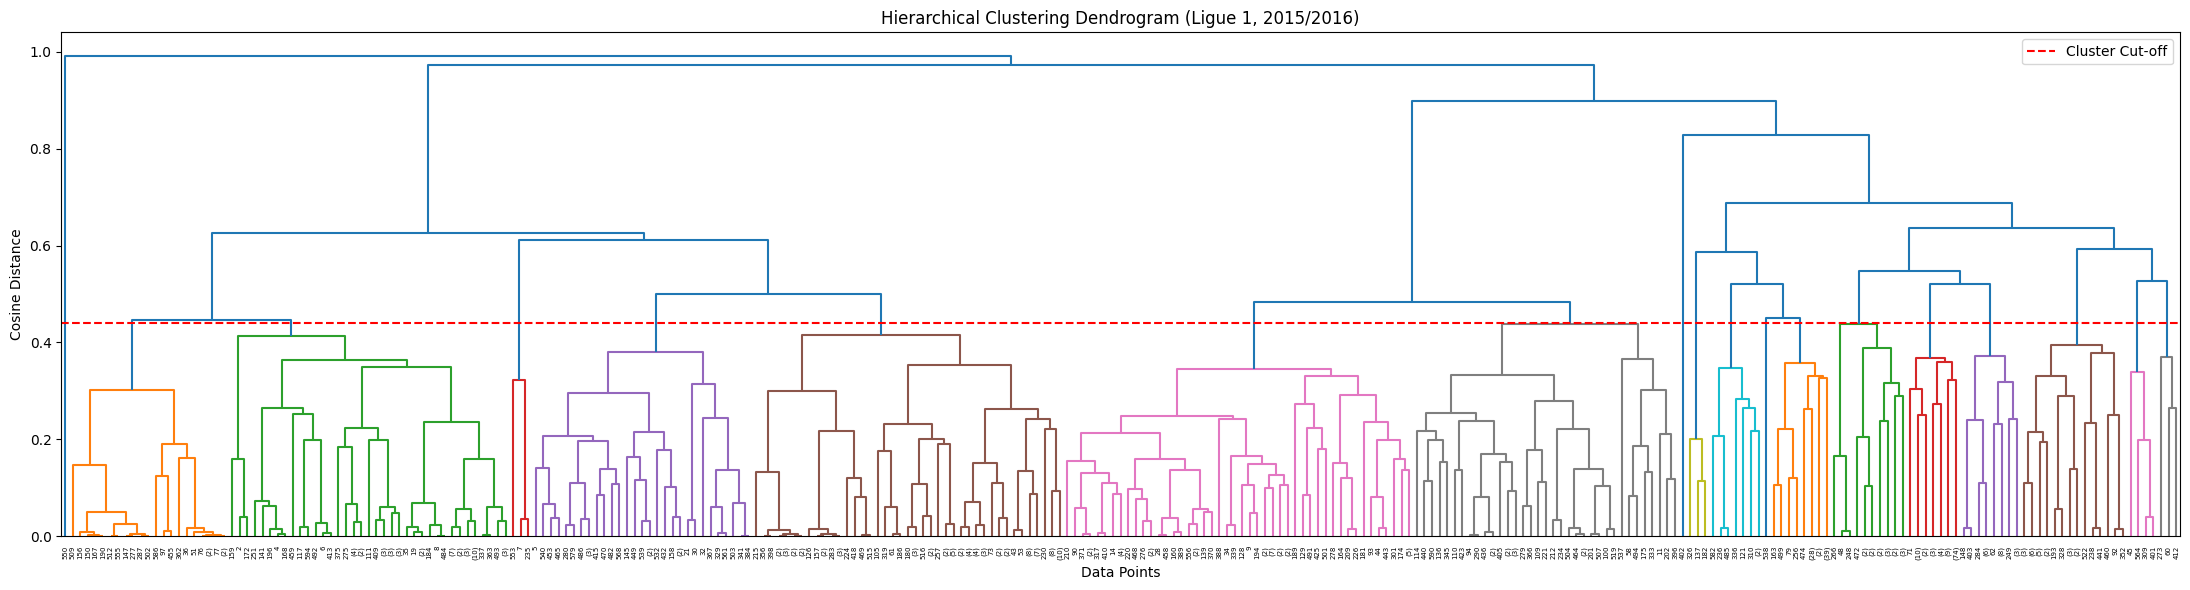

Assist counts per cluster:
cluster
1      23
2      68
3       3
4      33
5      97
6      65
7      40
8       3
9       8
10     74
11      1
12     18
13    103
14     22
15     29
16      4
17      3
18      1
19      1
Name: count, dtype: int64


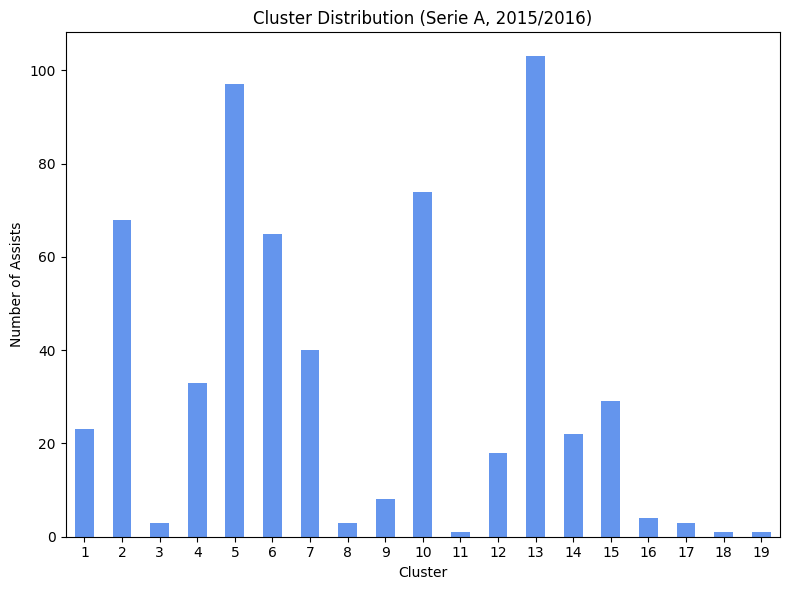

Total assists: 596
Through balls: 78 (13.1%)
High passes: 240 (40.3%)
Crosses: 193 (32.4%)
Ground passes: 275 (46.1%)


/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_40884/820021852.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  n_cross = df_assists['pass_cross'].fillna(False).astype(bool).sum() if 'pass_cross' in df_assists else 0


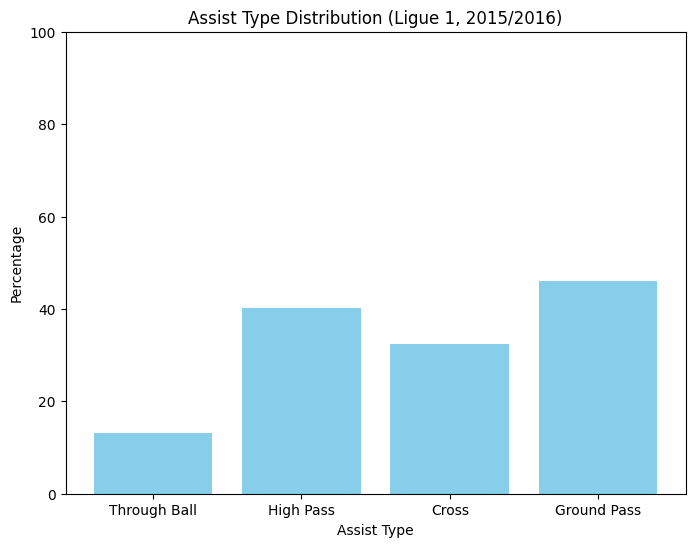

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# --- 1. Load data ---
df_assists = pd.read_csv('assists_ligue1_2015_2016.csv')

# --- 2. Preprocess location columns safely ---
for col in ['location', 'pass_end_location']:
    df_assists[col] = df_assists[col].apply(
        lambda x: x if isinstance(x, (list, tuple)) and len(x) == 2 else [np.nan, np.nan]
    )

start_loc = df_assists['location'].apply(pd.Series)
start_loc.columns = ['pass_start_x', 'pass_start_y']

end_loc = df_assists['pass_end_location'].apply(pd.Series)
end_loc.columns = ['pass_end_x', 'pass_end_y']

df_assists = pd.concat([df_assists, start_loc, end_loc], axis=1)

# --- 3. Build feature_df ---
feature_df = pd.DataFrame({
    'pass_length': df_assists['pass_length'],
    'pass_angle': df_assists['pass_angle'],
    'pass_height': df_assists['pass_height'],
    'pass_deflected': df_assists['pass_deflected'].fillna(0).astype(int),
    'under_pressure': df_assists['under_pressure'].fillna(0).astype(int),
    'pass_start_x': df_assists['pass_start_x'],
    'pass_start_y': df_assists['pass_start_y'],
    'pass_end_x': df_assists['pass_end_x'],
    'pass_end_y': df_assists['pass_end_y'],
    'pass_body_part': df_assists['pass_body_part'],
    'pass_technique': df_assists['pass_technique'],
    'play_pattern': df_assists['play_pattern'],
})

# --- 4. Ordinal encode pass_height ---
height_map = {'Ground Pass': 0, 'Low Pass': 1, 'High Pass': 2}
feature_df['pass_height'] = feature_df['pass_height'].map(height_map)

# --- 5. One-hot encode categorical features ---
categorical = ['pass_body_part', 'pass_technique', 'play_pattern']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded = encoder.fit_transform(feature_df[categorical].fillna('Unknown'))
encoded_cols = encoder.get_feature_names_out(categorical)
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=feature_df.index)

# --- 6. Scale numerical features ---
numerical = ['pass_length', 'pass_angle', 'pass_height', 'pass_deflected', 'under_pressure',
             'pass_start_x', 'pass_start_y', 'pass_end_x', 'pass_end_y']
scaler = StandardScaler()
scaled = scaler.fit_transform(feature_df[numerical])
scaled_df = pd.DataFrame(scaled, columns=numerical, index=feature_df.index)

# --- 7. Combine all features ---
X = pd.concat([scaled_df, encoded_df], axis=1)
X = X.fillna(0)

# --- 8. Hierarchical clustering ---
linked = linkage(X, method='average', metric='cosine')

plt.figure(figsize=(22, 6))
dendrogram(
    linked,
    truncate_mode="level", p=10,
    color_threshold=0.44
)
plt.axhline(y=0.44, color='r', linestyle='--', label="Cluster Cut-off")
plt.title('Hierarchical Clustering Dendrogram (Ligue 1, 2015/2016)')
plt.xlabel('Data Points')
plt.ylabel('Cosine Distance')
plt.legend()
plt.tight_layout()
plt.show()

# --- 9. Assign clusters ---
cluster_labels = fcluster(linked, t=0.44, criterion='distance')
feature_df['cluster'] = cluster_labels
# Count assists in each cluster
assist_counts = feature_df['cluster'].value_counts().sort_index()
print("Assist counts per cluster:")
print(assist_counts)
plt.figure(figsize=(8, 6))
assist_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Cluster Distribution (Serie A, 2015/2016)')
plt.xlabel('Cluster')
plt.ylabel('Number of Assists')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# --- 10. Statistical analysis ---
total = len(df_assists)
def pct(val): return 100 * val / total if total else 0

n_through = df_assists['pass_technique'].fillna('').str.contains('Through Ball').sum()
pct_through = pct(n_through)

n_high = df_assists['pass_height'].eq('High Pass').sum()
pct_high = pct(n_high)

n_cross = df_assists['pass_cross'].fillna(False).astype(bool).sum() if 'pass_cross' in df_assists else 0
pct_cross = pct(n_cross)

n_ground = df_assists['pass_height'].eq('Ground Pass').sum()
pct_ground = pct(n_ground)

print(f"Total assists: {total}")
print(f"Through balls: {n_through} ({pct_through:.1f}%)")
print(f"High passes: {n_high} ({pct_high:.1f}%)")
print(f"Crosses: {n_cross} ({pct_cross:.1f}%)")
print(f"Ground passes: {n_ground} ({pct_ground:.1f}%)")

# --- 11. Plot bar chart ---
labels = ['Through Ball', 'High Pass', 'Cross', 'Ground Pass']
sizes = [pct_through, pct_high, pct_cross, pct_ground]

plt.figure(figsize=(8,6))
plt.bar(labels, sizes, color='skyblue')
plt.title('Assist Type Distribution (Ligue 1, 2015/2016)')
plt.ylabel('Percentage')
plt.xlabel('Assist Type')
plt.ylim(0, 100)
plt.show()


In [4]:
df_assists.to_csv('assists_ligue1_2015_2016.csv', index=False)